# CONTENIDO

* [Introducción](#intro)
    * [Objetivo](#obj)
* [Descripción de datos](#desc)
* [Modelado con regresión lineal](#mrl)
    * [Modelado Región 1](#mr1)
    * [Modelado Región 2](#mr2)
    * [Modelado Región 3](#mr3)
    * [Conclusión](#c1)
* [Calculo de ganacias](#ganan)
    * [Conclusión](#c2)
* [Riesgos y ganacias por cada región](#rgr)
    * [Conclusión](#c3)
* [Conclusión final](#c_final)

## Introducción <a  id = 'intro'></a>

OilyGiant copañia minera está en búsqueda de el mejor lugar para la realización de un nuevo pozo. 
Tienes datos sobre muestras de crudo de tres regiones. Y se conocen los parámetros
de cada pozo petrolero de la región. 

### Objetivo <a id = 'obj'></a>

Crear un modelo que ayude a elegir la región con el
mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la
técnica bootstrapping.

## Descripción de datos<a id = 'desc'></a>

In [1]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Carga de datasets
region_one = pd.read_csv('/datasets/geo_data_0.csv')
region_two = pd.read_csv('/datasets/geo_data_1.csv')
region_three = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#Información de región 1
region_one.info()

#Visualización de datos
region_one.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#Información de región 2
region_two.info()

#Visualización de datos
region_two.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
#Información de región 3
region_three.info()

#Visualización de datos
region_three.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Observamos que en nuestras tres regiones tenemos un total de 100,000 datos y un total de 5 columnas, en ninguno existe valores nulos y los tipos de datos están correctos. El significado de nuestras columnas son las siguientes:

* `id`: identificador único de pozo de petróleo
* `f0`, `f1`, `f2`: tres características de los puntos
* `product`: volumen de reservas en el pozo de petróleo (miles de barriles).

Para nuestro modelado al no ser de utilidad la columna id se eliminará de las caracteristicas de entrenamiento

## Modelado con regresión lineal<a id = 'mrl'></a>

A continuación se realizará el modelado de las tres distintas regiones con las que contamos, se dividiran los datos a una proporción de 75:25, Elaboraremos una función para ralizar estos trabajos

In [6]:
#Función de para modelado con regresión lineal

def linear_regression(features,
                     target,
                     f_train,
                     f_valid, 
                     t_train, 
                     t_valid ):
    
    model = LinearRegression()
    model.fit(f_train,t_train)
    predictions_valid = model.predict(f_valid)
    
    ecm = mean_squared_error(t_valid,predictions_valid)
    recm = ecm **.5
    
    return predictions_valid ,recm
    

### Modelado región 1 <a id = "mr1"></a>

In [7]:
#División de datos en entrenamiento y validación

features_region_one = region_one.drop(['id', 'product'], axis = 1) 
target_region_one = region_one['product'] 

features_train, features_valid, target_train, target_valid_rOne = train_test_split( features_region_one,
                                                                              target_region_one,
                                                                              test_size = 0.25,
                                                                              random_state = 12345
                                                            )

prediction_region_one, recm_region_one = linear_regression(features_region_one, 
                                                          target_region_one,
                                                          features_train, 
                                                          features_valid, 
                                                          target_train, 
                                                          target_valid_rOne
                                                         )

print("Volumen promedio de reservas de la región 1:",prediction_region_one.mean())
print("RECM región 1:",recm_region_one)

Volumen promedio de reservas de la región 1: 92.59256778438035
RECM región 1: 37.5794217150813


### Modelado región 2 <a id = "mr2"></a>

In [8]:
#División de datos en entrenamiento y validación

features_region_two = region_two.drop(['id', 'product'], axis = 1) 
target_region_two = region_two['product'] 

features_train, features_valid, target_train, target_valid_two = train_test_split( features_region_two,
                                                                              target_region_two,
                                                                              test_size = 0.25,
                                                                              random_state = 12345
                                                            )

prediction_region_two,recm_region_two = linear_regression(features_region_two,
                                                          target_region_two,
                                                          features_train, 
                                                          features_valid, 
                                                          target_train, 
                                                          target_valid_two
                                                         )

print("Volumen promedio de reservas de la región 2:",prediction_region_two.mean())
print("RECM región 2:",recm_region_two)

Volumen promedio de reservas de la región 2: 68.728546895446
RECM región 2: 0.893099286775617


### Modelado región 3 <a id = "mr3"></a>

In [9]:
#División de datos en entrenamiento y validación

features_region_three = region_three.drop(['id', 'product'], axis = 1) 
target_region_three = region_three['product'] 

features_train, features_valid, target_train, target_valid_three = train_test_split(features_region_three,
                                                                              target_region_three,
                                                                              test_size = 0.25,
                                                                              random_state = 12345
                                                            )

prediction_region_three,recm_region_three = linear_regression(features_region_three,
                                                              target_region_three,
                                                              features_train, 
                                                              features_valid, 
                                                              target_train, 
                                                              target_valid_three)

print("Volumen promedio de reservas de la región 3:",prediction_region_three.mean())
print("RECM región 3:",recm_region_three)

Volumen promedio de reservas de la región 3: 94.96504596800489
RECM región 3: 40.02970873393434


### Conclusión <a id = 'c1'></a>

Nuestros resultados obtenidos para nuestra RECM fueron:
* Region 1: 37.57
* Región 2: 0.89
* Región 3: 40.02

Podemos observar que en la región dos es donde tenemos nuestro mejor comportamiento con el modelado con un error chico respecto a las otras dos regiones
En cuanto al promedio de acuerdo a nuestras predicciones la región tres es la mejor

## Calculo de ganacias<a id = "ganan"></a>

Para el calculo de ganancias la empresa ha aportado las siguiente pautas:

* Se seleccionaran los mejores 200 pozos
* El costo por barril es de \\$4.5 USD
* Se cuenta con una inversión de \\$100,000,000 para la realización de los 200 pozos

Se calculará el mínimo de volumen de petrolio por región para estimar el mínimo de volumen requerido para evitar perdidas. Asi como las ganancias obtenidas por los mejores 200 pozos predichos.

In [10]:
budget = 100000000 # presupuesto para la contrucción de 200 pozos
income = 4500 #Precio por unidad en miles de barriles

#Presupuesto para un pozo
budget_per_pit = budget / 200

#volumen necesario de barriles para no tener perdidas
volume_necesary = budget_per_pit / income

print("Presupuesto para la construcción de cada pozo:", budget_per_pit)
print("Volumen necesario para no tener perdidas:", volume_necesary )

Presupuesto para la construcción de cada pozo: 500000.0
Volumen necesario para no tener perdidas: 111.11111111111111


In [11]:
#Volumen promedio por región

print("Volumen promedio región 1:", region_one['product'].mean())
print("Volumen promedio región 2:", region_two['product'].mean())
print("Volumen promedio región 3:", region_three['product'].mean())

Volumen promedio región 1: 92.50000000000001
Volumen promedio región 2: 68.82500000000002
Volumen promedio región 3: 95.00000000000004


Se tiene un presupuesto por poso de $50,000 y para no tener perdidas se requiere de al menos un volumen de 112 mil barriles, Observamos que en promedio de producción ninguna los supera siendo la peor la región 2, se creará una función para determinar las ganancias(producción de cada pozo menos gastos de elaboración) producidas por los 200 mejores pozos de cada región

In [12]:
#Función de calculo de ganancia por region

def region_income(prediction_volume):
    total_volume = np.sort(prediction_volume)[::-1][:200].sum() #Ordenar de mayor a menor y obtener nuetros mejores 200 pozos
    income_region = (total_volume * income) - budget  
    return income_region

In [13]:
income_region_one = region_income(prediction_region_one)
income_region_two = region_income(prediction_region_two)
income_region_three = region_income(prediction_region_three)


#print("Volumen total de los 200 pozos:", total_volume_region_one )
print("Ganancia total por los 200 pozos región 1: ${:,.2f}".format(income_region_one))
print("Ganancia total por los 200 pozos región 2: ${:,.2f}".format(income_region_two))
print("Ganancia total por los 200 pozos región 3: ${:,.2f}".format(income_region_three))

Ganancia total por los 200 pozos región 1: $39,960,488.77
Ganancia total por los 200 pozos región 2: $24,857,120.52
Ganancia total por los 200 pozos región 3: $33,217,543.96


### Conclusión<a id = 'c2'></a>

Observamos que considerando el promedio de nuestros pozos no alcanzamos el mínimo para no generar perdidas, más sin embargo considerando nuestros mejores 200 pozos , no obtivimos perdidas sino ganancias, especialmente en la región 1 guiandonos en estas observaciones podríamos considerar a la región 1 como nuestra mejor opción.

## Riegos y ganacias por cada región<a  id = 'rgr'></a>

A continuación utilizaremos el método de bootstrapping para ver la distribución del beneficio, tambíen veremos nuestro intervalo de confianza con un 95%, esto por cada región. Para el estudio se considerará las siguientes condiciones:

* 1000 muestras en total
* 500 puntos a tomar
* Selección de los mejores 200 puntos

Crearemos cuatro funciones, uno para el calculo de las ganacias, otra para el calculo de riesgo y otra para la realización del bootstraping y la última otra para ver graficamente los resultados

In [14]:
#Función para el cálculo de de ganancias y perdidas

def revenue(target_subsample,probs_subsample, count,budget):
       
    prediction_sorted = probs_subsample.sort_values(ascending= False) # ordenamos los valroes obtenidos en el bootstraping
    selected = target_subsample[prediction_sorted.index][:count] # seleccionamos los valores verdaderos
    total = (income * selected.sum())-budget
    
    
        
    
    return total

In [61]:
# Calculo de riesgo

def risk_calculation(revenue):

    counter = 0
    for element in revenue:
        if element < 0:
            counter += 1
    return counter / len(revenue)
   

In [62]:
#Función para realización de gráfica     

def grafica(intervalo_confianza,muestra,region):
        
#graficando la distribución de precios de acuerdo a las ganancias
    plt.figure(figsize=(12,9))
    plt.hist(muestra,bins = 30, color = 'green')

#Visualización de intervalo de confianza en el histograma
    #Límite inferior
    plt.axvline(intervalo_confianza[0],
               label = "Limite inferior q = 2.5%",
               color = "red",
               lw = 3,
               linestyle = "--")
#Límite superior
    plt.axvline(intervalo_confianza[1],
               label = "Limite inferior q = 97.5%",
               color = "red",
               lw = 3,
               linestyle = "--")    
#media de la muestra
    plt.axvline(np.mean(muestra),
               label = "Media Muestral",
               color = "black",
               lw = 3,
               linestyle = "dotted")   

    plt.xlabel("Ganancia de los mejores 200 pozos")
    plt.ylabel("Frecuencia")
    plt.title('Histograma de ganancias promedio muestral de los 200 mejores pozos región ' + region)
    plt.legend(bbox_to_anchor =(1,0.5))
    plt.show()

In [63]:
#Función para el cálculo de de ganancias e intervalo de confianza
def region_bootstrapping(prediction,target,count,income,region, budget):
    
    target = target.reset_index(drop = True) ## Reseteamos los indicices de nuestro target para tener los mismos que en el array de prediction
    prediction = pd.Series(prediction) ## Convertimos nuestras predicciones de array a Series
        
    
    state = np.random.RandomState(12345)
    values = []
    
    # Bootstraping con lo valores de nuestras predicciones 
    for i in range (1000):
        target_subsample = target.sample(n = 500, replace = True, random_state = state)
        probs_subsample = prediction[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, count,budget))
    

    #Calculo del Intervalo de confianza
    
    intervalo_de_confianza = np.quantile(values, [0.025,0.975])
    
    #Realización de gráfica
    grafica(intervalo_de_confianza, values,region)
    
    return  values, intervalo_de_confianza
        

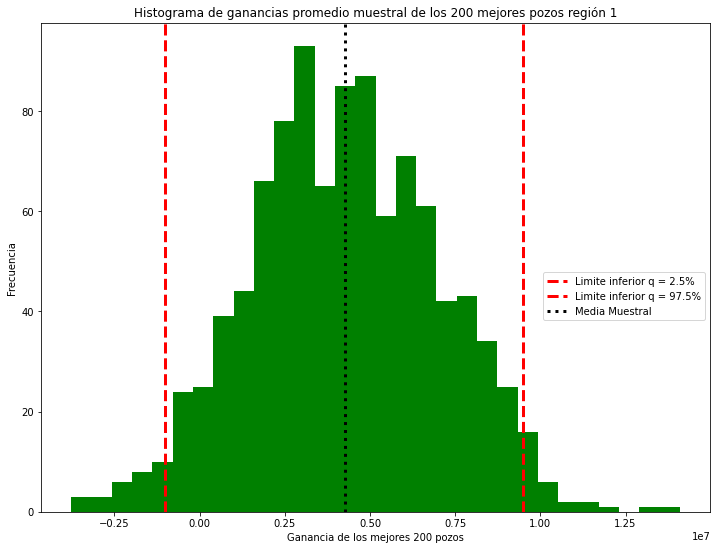

Valor promedio de ganancia:$4,259,385.27
Rango de confianza($-1,020,900.95 ,$9,479,763.53 )
Riesgo: 6.00%


In [64]:
#Llamado a la función para la región 1
value_regionOne, int_confianza= region_bootstrapping(prediction_region_one,
                                                     target_valid_rOne,
                                                     200,
                                                     income,
                                                     region ='1',
                                                     budget = budget)

#Impresion de valores
print("Valor promedio de ganancia:${:,.2f}".format(np.mean(value_regionOne)))
print("Rango de confianza(${:,.2f}".format(int_confianza[0]), ",${:,.2f}".format(int_confianza[1]),')')
print("Riesgo: {:,.2%}".format(risk_calculation(value_regionOne)))

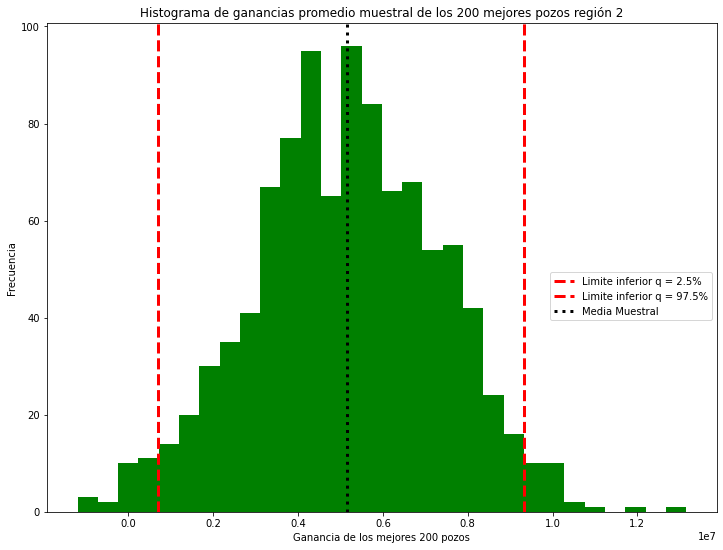

Valor promedio de ganancia:$5,152,227.73
Rango de confianza($688,732.25 ,$9,315,475.91 )
Riesgo: 1.00%


In [52]:
#Llamado a la función para la región 2
value_regionTwo, int_confianza= region_bootstrapping(prediction_region_two,
                                                     target_valid_two,
                                                     200,
                                                     income,
                                                     region ='2', 
                                                     budget = budget)

#Impresion de valores

print("Valor promedio de ganancia:${:,.2f}".format(np.mean(value_regionTwo)))
print("Rango de confianza(${:,.2f}".format(int_confianza[0]), ",${:,.2f}".format(int_confianza[1]),')')
print("Riesgo: {:,.2%}".format(risk_calculation(value_regionTwo)))

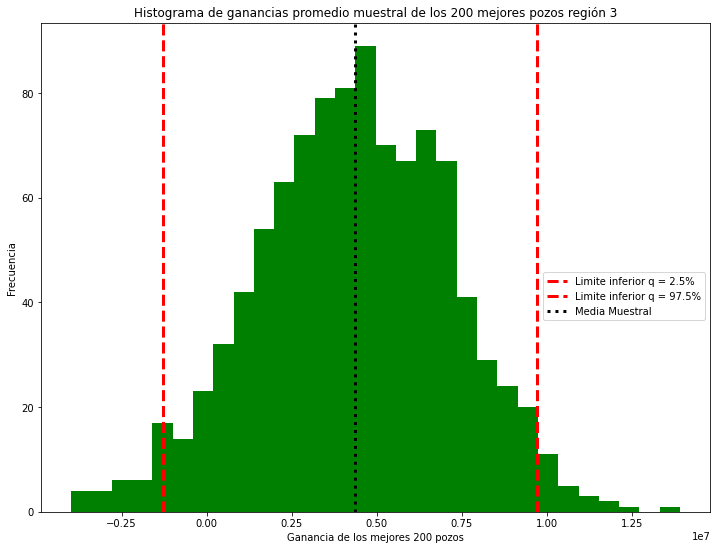

Valor promedio de ganancia:$4,350,083.63
Rango de confianza($-1,288,805.47 ,$9,697,069.54 )
Riesgo: 6.40%


In [54]:
#Llamado a la función para la región 3
value_regionThree, int_confianza= region_bootstrapping(prediction_region_three,
                                                       target_valid_three,
                                                       200,
                                                       income,
                                                       region ='3', 
                                                       budget = budget)

#Impresion de valores

print("Valor promedio de ganancia:${:,.2f}".format(np.mean(value_regionThree)))
print("Rango de confianza(${:,.2f}".format(int_confianza[0]), ",${:,.2f}".format(int_confianza[1]),')')
print("Riesgo: {:,.2%}".format(risk_calculation(value_regionThree)))

### Conclusión <a id = 'c3'></a>

En nuestros resultados obtenidos podemos observar como las regiones uno y tres tenemos un valor de ganacia promedio muy parecido y tenemos en nuestro quantil inferior valores negativos para ambos casos, que nos representa un riesgo del 6% y 6.40% del total de nuestras muestras

En nuestro estudio podemos notar como la región dos sería la mejor opción teniendo una ganacia mayor de $5,000,000 así como un riesgo del 1\% , tambien el intervalo de confianza se encuentra en ambos extremos en números positivos

## Conclusión final <a id = 'cf'></a>

Contamos con tres datasets de tres regiones distintas, todas tenian una cantidad de 100,000 filas y 4 columnas no se encontraron valores nulos y los tipos de datos estaban bien.

Se hizo uso del modelado y entrenamiento de nuestros datasets haciendo uso del modelo de regresión lineal, descartamos la columna id dado a que no nos representaba ninguna característica útil para el modelado, obtuvimos nuestro Rem de cada región para ver el error estimado.

Obtuvimos el volúmen mínimo para que no se tuvieran perdidas de inversión así como el calculo de las ganancias por el promedio de las predicciones realizadas de nuestros modelos.

Para finalizar se aplicó el método de bootstraping con un muestro de 1000, en donde tambíen se calculó el intervalo de confianza del 95%, para esta sección obtuvimos que el mejor lugar de inversión es en la región dos lugar en donde se obtuvo la mejor ganancia y el menor riesgo, el intervalo de confianza se mantuvo positivo en ambos extremos y en donde nuestro modelo tuvo el menor RECM.